In [33]:
import pickle 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
supermarket = pd.read_csv('supermarket_sales - Sheet1.csv')
supermarket

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [35]:
from sklearn.preprocessing import FunctionTransformer
log_scaler = FunctionTransformer()
log_scaler = FunctionTransformer(func = np.log, inverse_func= np.exp)

In [36]:
supermarket =  pd.get_dummies(data = supermarket, drop_first = True, columns=['Branch','Payment','City', 'Customer type', 'Gender', 'Product line'])

In [37]:
supermarket = supermarket.drop(['gross margin percentage','Invoice ID','Date','Time'],axis=1)

In [38]:
log = log_scaler.fit_transform(supermarket[['gross income','Tax 5%','Total','cogs']])

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [39]:
log

array([[3.26352409, 3.26352409, 6.30804653, 6.25925636],
       [1.34025042, 1.34025042, 4.38477286, 4.3359827 ],
       [2.78596757, 2.78596757, 5.83049001, 5.78169985],
       ...,
       [0.46499109, 0.46499109, 3.50951353, 3.46072336],
       [1.19119147, 1.19119147, 4.23571391, 4.18692374],
       [3.43137088, 3.43137088, 6.47589332, 6.42710316]])

In [40]:
supermarket.drop(['Tax 5%','Total','cogs','gross income'],axis=1, inplace=True)

In [41]:
data = pd.concat([supermarket,pd.DataFrame(log,columns=['gross income','Tax 5%','Total','cogs'])],axis=1)

In [42]:
data.head()

,Unit price,Quantity,Rating,Branch_B,Branch_C,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,gross income,Tax 5%,Total,cogs
0,74.69,7,9.1,0,0,0,1,0,1,0,0,0,0,1,0,0,3.263524,3.263524,6.308047,6.259256
1,15.28,5,9.6,0,1,0,0,1,0,1,0,0,0,0,0,0,1.340250,1.340250,4.384773,4.335983
2,46.33,7,7.4,0,0,1,0,0,1,1,1,0,0,0,1,0,2.785968,2.785968,5.830490,5.781700
3,58.22,8,8.4,0,0,0,1,0,1,0,1,0,0,1,0,0,3.147938,3.147938,6.192461,6.143670
4,86.31,7,5.3,0,0,0,1,0,1,1,1,0,0,0,0,1,3.408123,3.408123,6.452646,6.403856


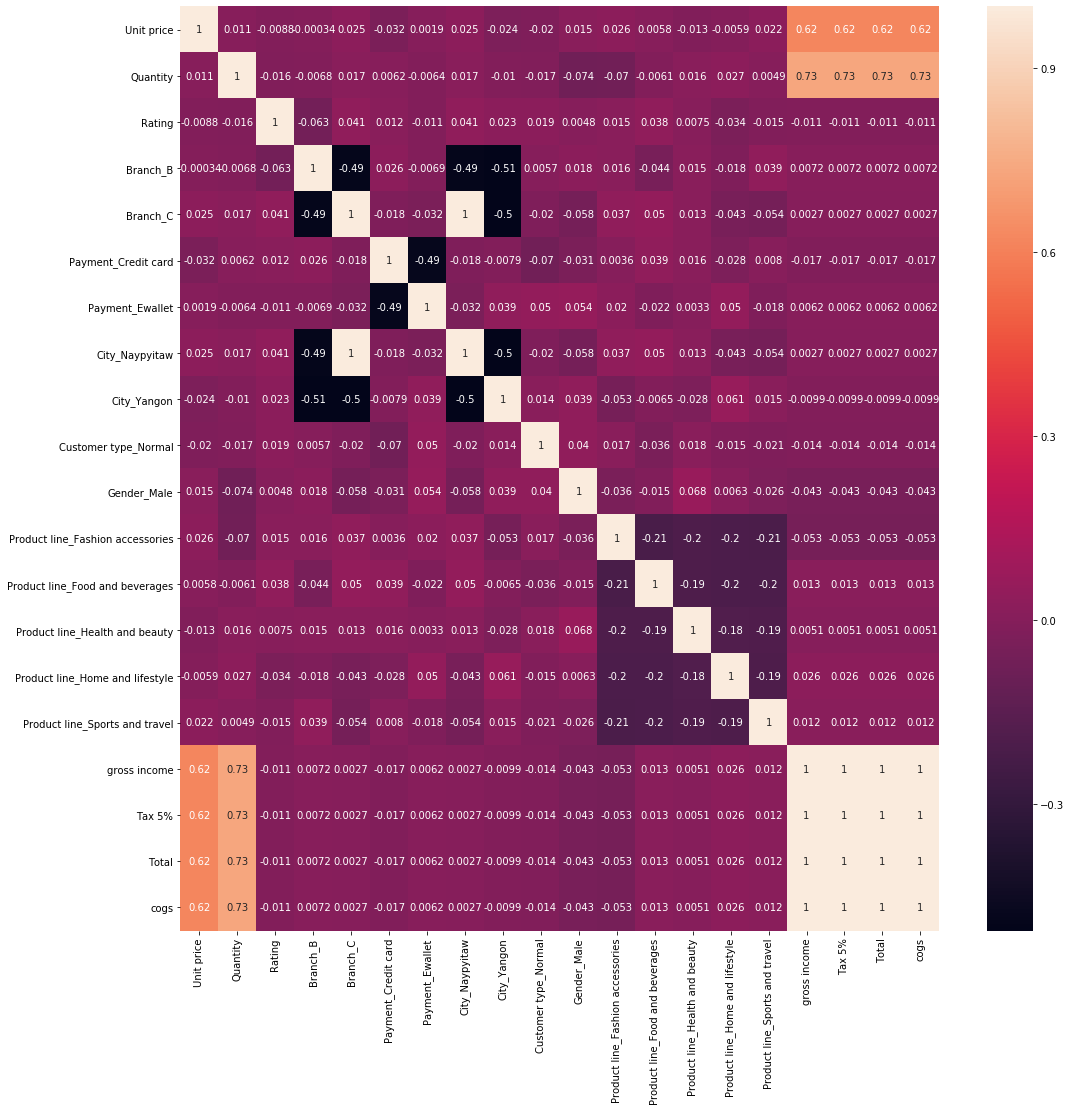

In [43]:
plt.figure(figsize=(17,17))

sns.heatmap(data.corr(),annot=True)

In [44]:
data.drop(['Tax 5%','Total','cogs'],axis=1,inplace=True)

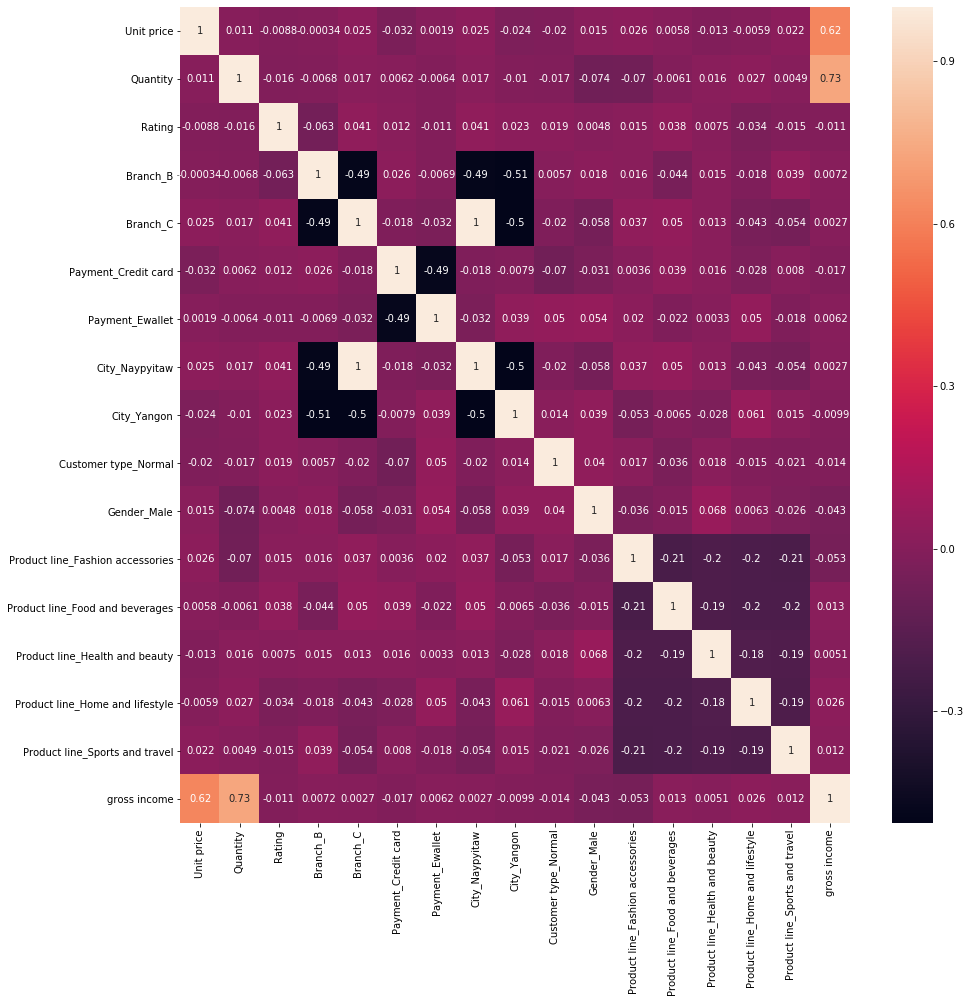

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [46]:
y = data['gross income']

In [47]:
X = data.drop('gross income',axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(lm.intercept_)

-0.19445323342758325


In [52]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unit price,0.021580
Quantity,0.234679
Rating,0.011798
Branch_B,0.013456
Branch_C,-0.022228
Payment_Credit card,0.005248
Payment_Ewallet,0.024739
City_Naypyitaw,-0.022228
City_Yangon,0.008773
Customer type_Normal,0.007519


In [53]:
predictions = lm.predict(X_test)

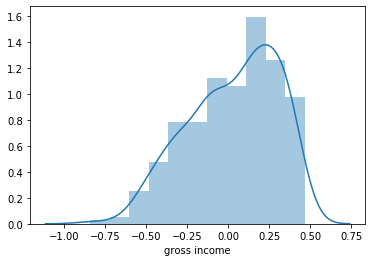

In [54]:
sns.distplot(y_test-predictions)

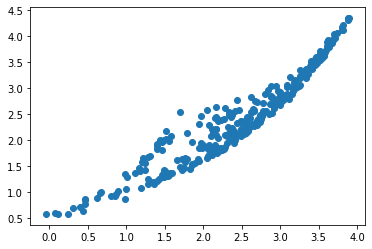

In [55]:
plt.scatter(y_test, predictions)

In [56]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))


MAE: 0.232559520191149
MSE: 0.07389425471212721
RMSE: 0.271834976984433
R2: 0.9022133647830158


In [57]:
import statsmodels.api as sm
lr=sm.OLS(y_train,sm.add_constant(X_train.copy()))
res=lr.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           gross income   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     536.5
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:22:13   Log-Likelihood:                -87.982
No. Observations:                 700   AIC:                             206.0
Df Residuals:                     685   BIC:                             274.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
X = X[['Unit price','Quantity','Rating','City_Naypyitaw','City_Yangon']]

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

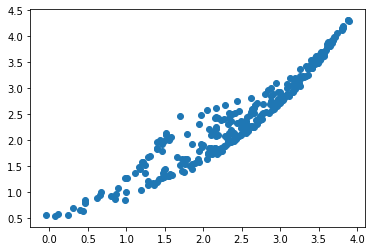

In [60]:
pred = lm.predict(X_test)
plt.scatter(y_test,pred)

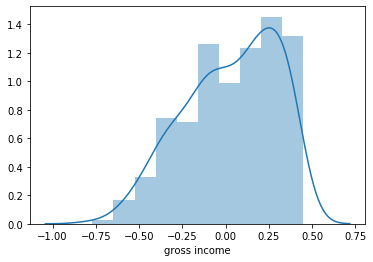

In [61]:
sns.distplot(y_test-pred)

In [62]:
pickle.dump(lm,open('lm.sav','wb'))

In [63]:
pkl=pickle.load(open('lm.sav','rb'))
pkl

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
pkl.coef_

array([ 0.02154731,  0.23563749,  0.01184729, -0.05396738, -0.00162235])

In [69]:
predict=pkl.predict(np.array([2,2,2,1,0]).reshape(1,-1))

In [76]:
log_scaler.inverse_transform(np.array(predict).reshape(1,-1))[0][0]

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


1.3400241267664041

In [66]:
X.head()

,Unit price,Quantity,Rating,City_Naypyitaw,City_Yangon
0,74.69,7,9.1,0,1
1,15.28,5,9.6,1,0
2,46.33,7,7.4,0,1
3,58.22,8,8.4,0,1
4,86.31,7,5.3,0,1
